In [125]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
N = 50000
b = 15
x = random.randn(N)
y = np.zeros(N-b)

for ind in range(N-b):
    y[ind] = 0.1*random.rand() + np.trapz(x[ind:b+ind])*(1./b)
    
y = y - np.mean(y)
x = x[b:]

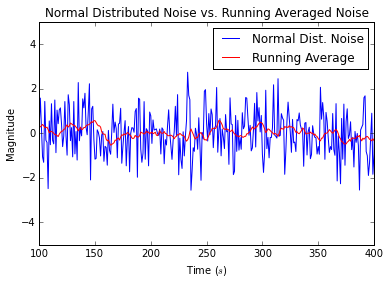

In [127]:
plt.plot(range(N-b),x,label='Normal Dist. Noise')
plt.plot(range(N-b),y,'r',label='Running Average')
plt.xlim(100,400)
plt.title('Normal Distributed Noise vs. Running Averaged Noise')
plt.xlabel(r'Time ($s$)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

In [128]:
nfft = 256
Gyy, fyy = mlab.psd(y, NFFT = nfft, Fs = 1, noverlap = nfft/2)
Gxx, fxx = mlab.psd(x, NFFT = nfft, Fs = 1, noverlap = nfft/2)
Gxy, fxy = mlab.csd(y, x, NFFT = nfft, Fs = 1, noverlap = nfft/2)

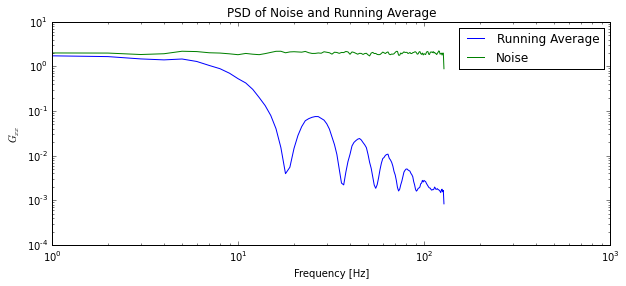

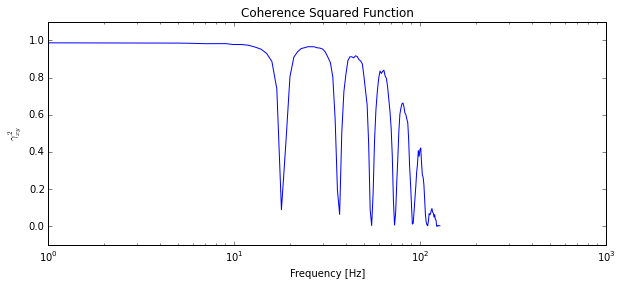

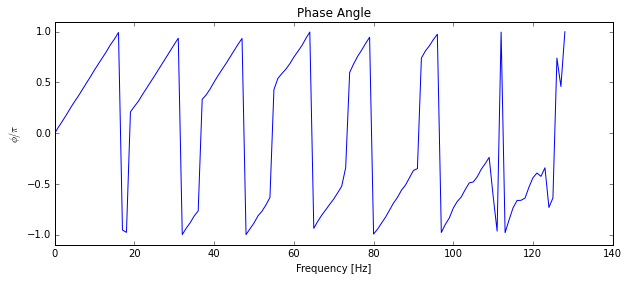

In [129]:
fit,ax1=plt.subplots(1,1,figsize=(10, 4))
ax1.loglog(Gyy,label='Running Average')
ax1.loglog(Gxx,label='Noise')
ax1.set_title('PSD of Noise and Running Average');ax1.set_xlabel('Frequency [Hz]');ax1.set_ylabel('$G_{xx}$')
ax1.legend()

fit,ax2=plt.subplots(1,1,figsize=(10, 4))
gamtop = np.abs(Gxy)**2
gambot = Gxx*Gyy
gamma = gamtop/gambot
ax2.semilogx(gamma)
ax2.set_ylim([-.1,1.1])
ax2.set_title('Coherence Squared Function');ax2.set_xlabel('Frequency [Hz]');ax2.set_ylabel(r'$\gamma_{xy}^2$')

ang = np.arctan2(np.imag(Gxy),np.real(Gxy))
fit,ax3=plt.subplots(1,1,figsize=(10, 4))
ax3.plot(ang/np.pi)
ax3.set_ylim([-1.1,1.1])
ax3.set_title('Phase Angle');ax3.set_xlabel('Frequency [Hz]');ax3.set_ylabel(r'$\phi/\pi$')

Looking at the first plot, it is seen that when the runnng average is used, the higher frequencies are suppressed, while the low frequencies remain reatively similar.

The coherence remains high for low frequencies, then for higher frequencies drops periodically corresponing to the drops in the PSD for the running average.

the phase angle has been nomalized by $\pi$ and changes between $\pi$ and $-\pi$. or lower frequencies the angle spends more time greater than 0, but as the frequencies increase this changes and it spends more time less than zero.

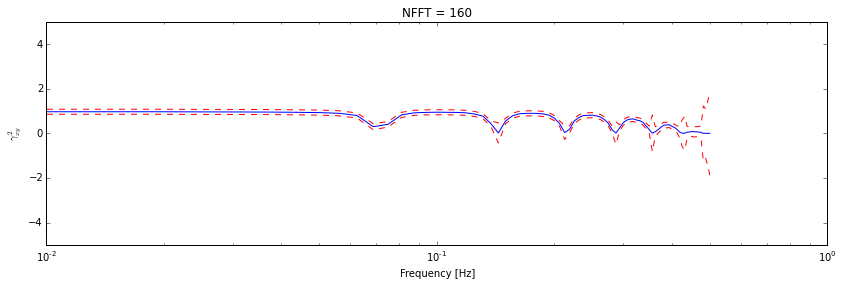

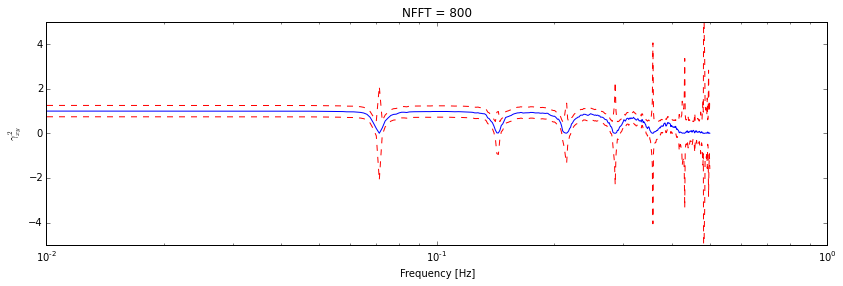

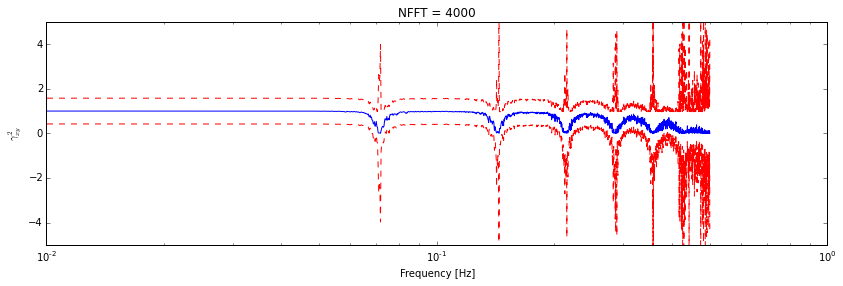

In [130]:
nfft = 2**5
for i in range(1,4):
    nfft = nfft*5
    Gyy, fyy = mlab.psd(y, NFFT = nfft, Fs = 1, noverlap = nfft/2)
    Gxx, fxx = mlab.psd(x, NFFT = nfft, Fs = 1, noverlap = nfft/2)
    Gxy, fxy = mlab.csd(y, x, NFFT = nfft, Fs = 1, noverlap = nfft/2)

    nblock = (float(N)/nfft)*2-1
    
    
    fit,ax=plt.subplots(1,1,figsize=(14, 4))
    gamma = (np.abs(Gxy)**2)/(Gxx*Gyy)
    
    gamUpper = (gamma)+((np.sqrt(2)*(1+gamma))/(np.abs(np.sqrt(gamma))*np.sqrt(nblock)))
    gamLower = (gamma)-((np.sqrt(2)*(1+gamma))/(np.abs(np.sqrt(gamma))*np.sqrt(nblock)))
    
    ax.semilogx(fxy,gamma)
    ax.semilogx(fxy,gamUpper,'r--')
    ax.semilogx(fxy,gamLower,'r--')
    ax.set_ylim([-5,5])
    ax.set_xlim([10e-3,10e-1])
    ax.set_title('NFFT = {}'.format(nfft));ax.set_xlabel('Frequency [Hz]');ax.set_ylabel(r'$\gamma_{xy}^2$')

**Question: 2**

In [131]:
time=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/time.txt')
ac=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/ac.txt')
shear=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/s.txt')

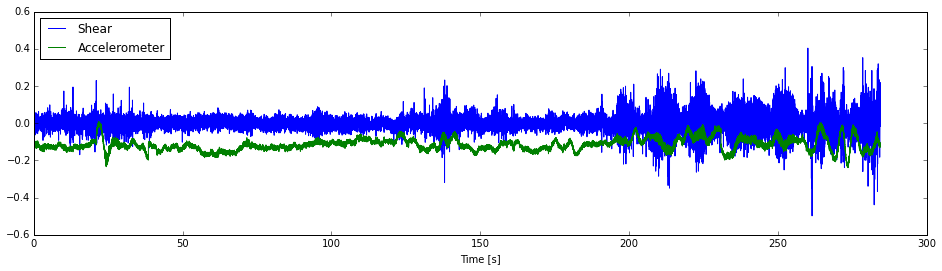

In [132]:
fit,ax = plt.subplots(1,1,figsize=(16, 4))
ax.plot(time,shear,label = 'Shear')
ax.plot(time,ac,label = 'Accelerometer')
ax.set_xlabel('Time [s]')
ax.legend(loc=2)

It can be seen that the acceleration appears to get more turbulent around the same time as the shear, and remains calm at around the same times.

In [133]:
nfft = 256
Gs, fs = mlab.psd(shear, NFFT = nfft, Fs = 1, noverlap = nfft/2)
Ga, fa = mlab.psd(ac, NFFT = nfft, Fs = 1, noverlap = nfft/2)
Gsa, fsa = mlab.csd(shear, ac, NFFT = nfft, Fs = 1, noverlap = nfft/2)
gamma = (np.abs(Gsa)**2)/(Gs*Ga)

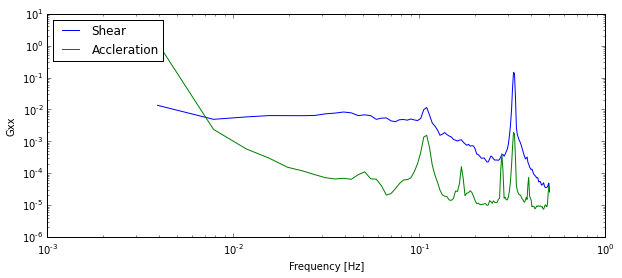

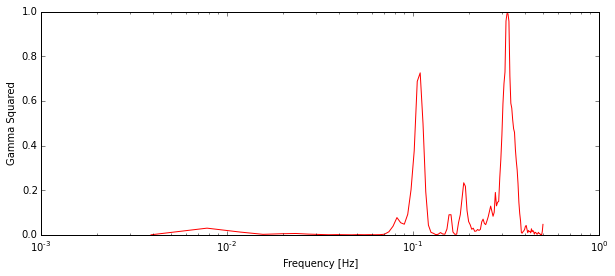

In [134]:
fit,ax = plt.subplots(1,1,figsize=(10, 4))
ax.loglog(fs,Gs,label='Shear')
ax.loglog(fa,Ga,label='Accleration')
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Gxx")
ax.legend(loc=2)
fit,ax2 = plt.subplots(1,1,figsize=(10, 4))
ax2.semilogx(fsa,gamma,'r')
ax2.set_ylabel("Gamma Squared")
ax2.set_xlabel("Frequency [Hz]")

The coherence spectrum shows a large correlation to to main frequencies around 10 and 30 Hz. There also appears to be smaller corelations corresponsing to most of the peaks in the acceleration spectrum. Most of the time a small coresponding peak can be observed in the shear spectrum.

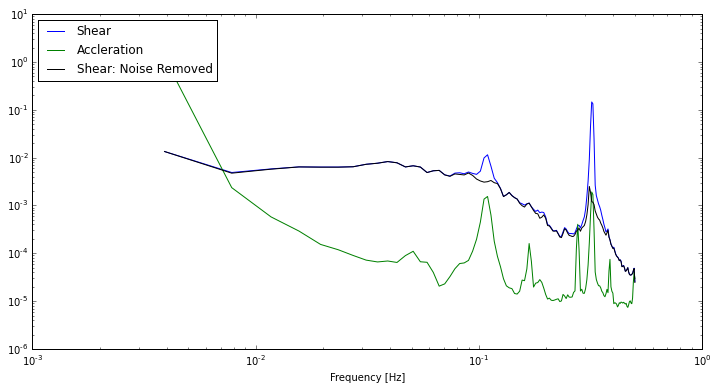

In [135]:
fit,ax = plt.subplots(1,1,figsize=(12, 6))
Gs2 =  Gs-abs(Gsa)**2/Ga
ax.loglog(fs,Gs,label='Shear')
ax.loglog(fa,Ga,label='Accleration')
ax.loglog(fs,Gs2,'k',label='Shear: Noise Removed')
ax.set_xlabel("Frequency [Hz]")
ax.legend(loc=2)

The method used to remove the noise did a good job of removing the first major peak, but was not able to completelly remove the second larger peak.

In [136]:
T = time[1]-time[0]
#turbulent 200s to 250s
t1 = int(200/T);t2 = int(250/T)
shear_t = shear[t1:t2:]
ac_t = ac[t1:t2:]
time_q = time[t1:t2:]
#quiet 50s to 100s
q1=int(50/T);q2=int(100/T)
shear_q = shear[q1:q2:]
ac_q = ac[q1:q2:]
time_q = time[q1:q2:]

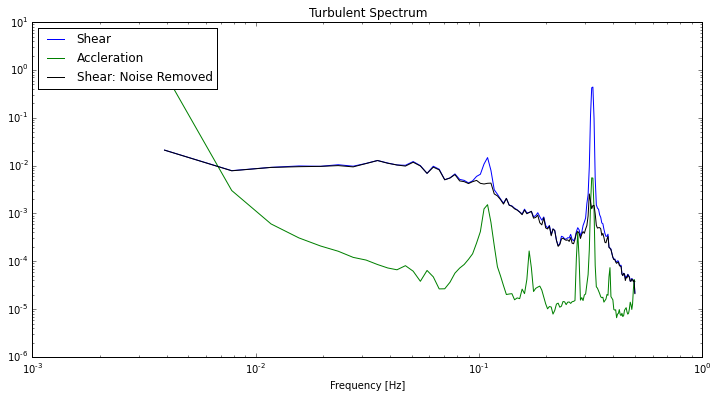

In [137]:
nfft = 256
Gs, fs = mlab.psd(shear_t, NFFT = nfft, Fs = 1, noverlap = nfft/2)
Ga, fa = mlab.psd(ac_t, NFFT = nfft, Fs = 1, noverlap = nfft/2)
Gsa, fsa = mlab.csd(shear_t, ac_t, NFFT = nfft, Fs = 1, noverlap = nfft/2)
gamma = (np.abs(Gsa)**2)/(Gs*Ga)

fit,ax = plt.subplots(1,1,figsize=(12, 6))
Gs2 =  Gs-abs(Gsa)**2/Ga
ax.loglog(fs,Gs,label='Shear')
ax.loglog(fa,Ga,label='Accleration')
ax.loglog(fs,Gs2,'k',label='Shear: Noise Removed')
ax.set_xlabel("Frequency [Hz]");ax.set_xlabel("Frequency [Hz]");ax.set_title('Turbulent Spectrum')
ax.legend(loc=2)

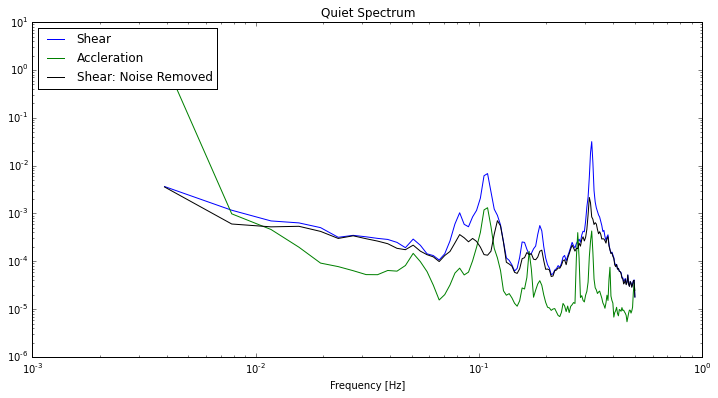

In [138]:
nfft = 256
Gs, fs = mlab.psd(shear_q, NFFT = nfft, Fs = 1, noverlap = nfft/2)
Ga, fa = mlab.psd(ac_q, NFFT = nfft, Fs = 1, noverlap = nfft/2)
Gsa, fsa = mlab.csd(shear_q, ac_q, NFFT = nfft, Fs = 1, noverlap = nfft/2)
gamma = (np.abs(Gsa)**2)/(Gs*Ga)

fit,ax = plt.subplots(1,1,figsize=(12, 6))
Gs2 =  Gs-abs(Gsa)**2/Ga
ax.loglog(fs,Gs,label='Shear')
ax.loglog(fa,Ga,label='Accleration')
ax.loglog(fs,Gs2,'k',label='Shear: Noise Removed')
ax.set_xlabel("Frequency [Hz]");ax.set_title('Quiet Spectrum')
ax.legend(loc=2)

The turbulent spectrum appears very simmilar to the spectrum of the full time series. While for the quiet spectrum, the shear appears to look more like the acceleration than in the full time series. This is most likely because the turbulet portion of the time series has a much stronger signal and is less affected by noise.